In [1]:
import pandas as pd

df_path = '/Users/neelapatil/Desktop/College/DAI-101/tips (data for regression problem).csv'
df = pd.read_csv(df_path)

df.head(), df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,
 None,
        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000)

In [2]:
# We are checking for any missimg values.

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [3]:
# We will convert our string values to numerical values.

df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})

df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

print(df.head())


   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    1       0    3     1     2
1       10.34  1.66    0       0    3     1     3
2       21.01  3.50    0       0    3     1     3
3       23.68  3.31    0       0    3     1     2
4       24.59  3.61    1       0    3     1     4


In [4]:
df_new = df.copy()
# Since there are only 244 observations, we dont have to remove outliers

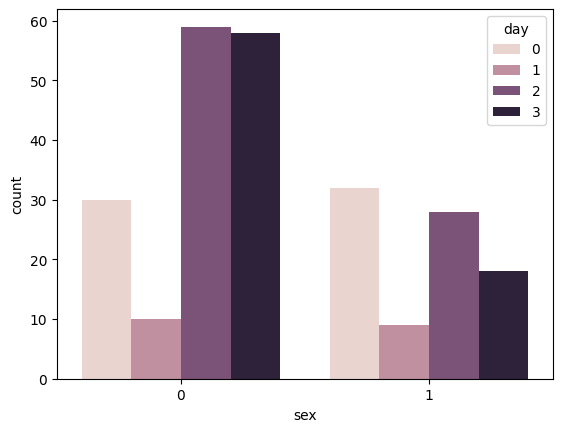

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex',data=df_new,hue='day')
plt.show()

#As we can see, most women come on Thursday whereas most men come on Saturday.

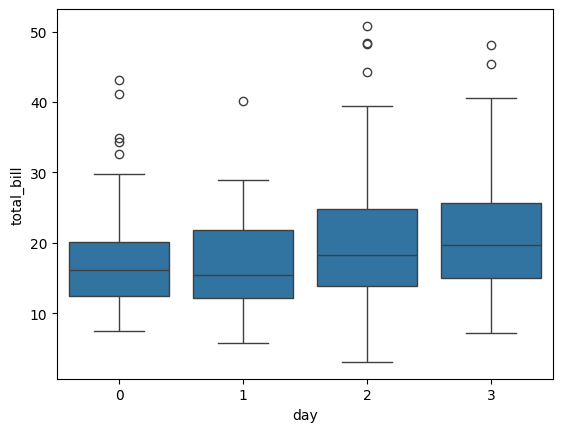

In [6]:

sns.boxplot(x='day',y='total_bill',data=df_new)
plt.show()

#There arent many outliers in general

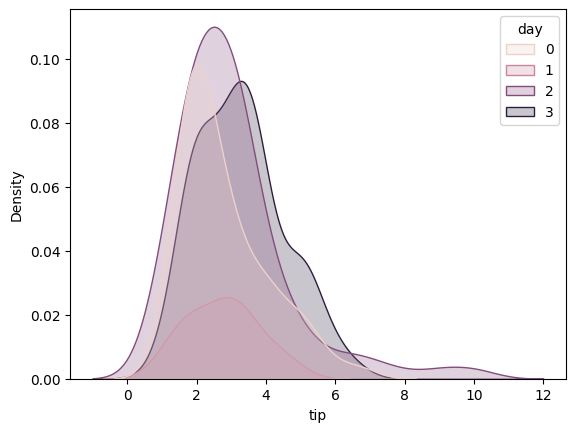

In [7]:
sns.kdeplot(data=df_new, x='tip', hue='day', fill=True)
plt.show()

# We can see the most tips are recieved on Saturday and it is a very sharp curve around between 2 and 4.

<Axes: xlabel='total_bill', ylabel='tip'>

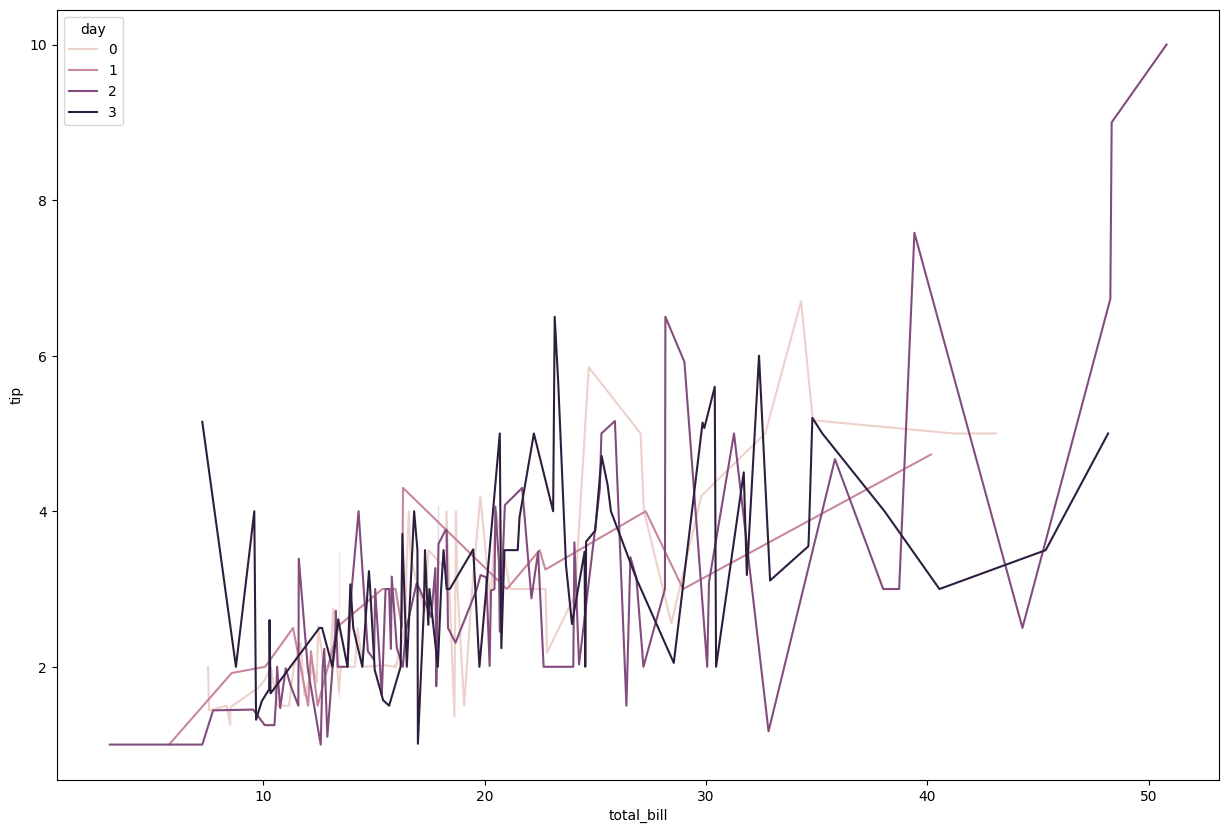

In [8]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="total_bill", y="tip",hue="day", markers=True, dashes=False, data=df)


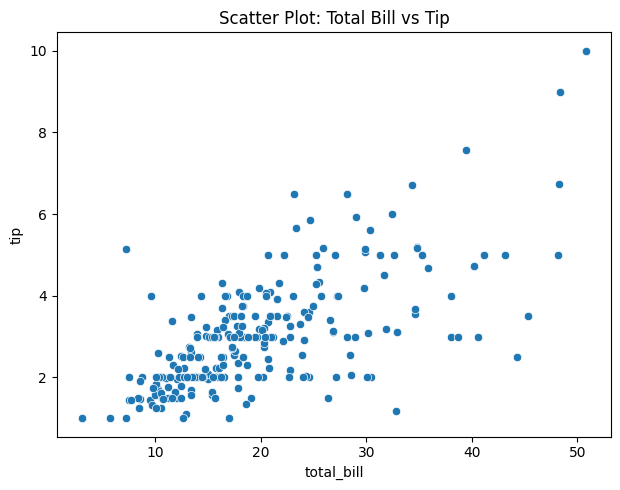

In [9]:

# Scatter Plot: Tip vs Total Bill
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_new, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')


plt.tight_layout()
plt.show()


# From the scatter plot we can see there is somewhat a linear pattern in tips with the total bill
# Also we can notice majority of the customers appear as a duplet.


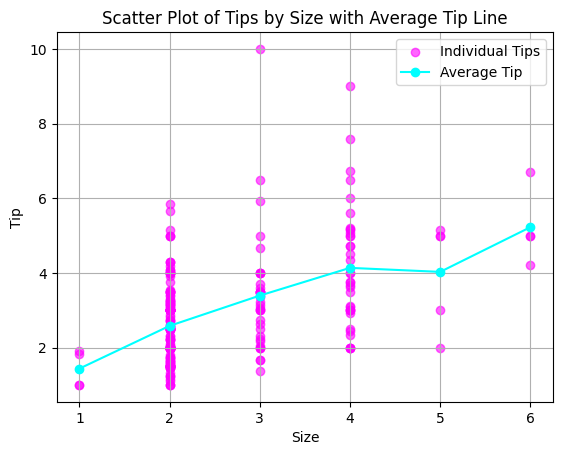

In [10]:
average_tips = df.groupby('size')['tip'].mean()

plt.scatter(df['size'], df['tip'], color='magenta', label='Individual Tips', alpha=0.6)

plt.plot(average_tips.index, average_tips.values, color='cyan', marker='o', linestyle='-', linewidth=1.5, label='Average Tip')

plt.xlabel('Size')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tips by Size with Average Tip Line')
plt.legend()
plt.grid(True)
plt.show()

#The average tip has an almost linear trend till the size of four , beyond which it takes a little drop and then an increase at 5

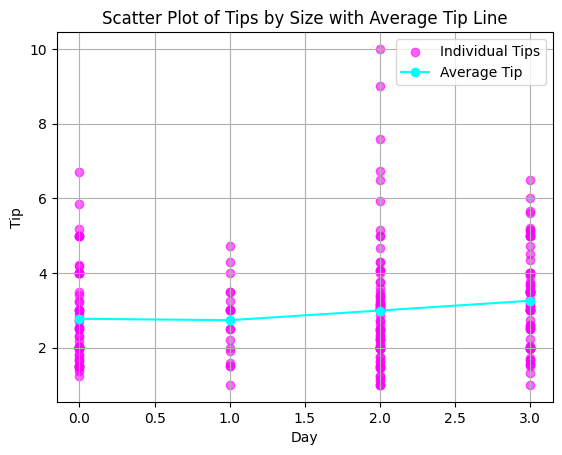

In [11]:
average_tips = df.groupby('day')['tip'].mean()

plt.scatter(df['day'], df['tip'], color='magenta', label='Individual Tips', alpha=0.6)

plt.plot(average_tips.index, average_tips.values, color='cyan', marker='o', linestyle='-', linewidth=1.5, label='Average Tip')

plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tips by Size with Average Tip Line')
plt.legend()
plt.grid(True)
plt.show()
# Doesnt change much with days, we only notice a few outliers on saturday

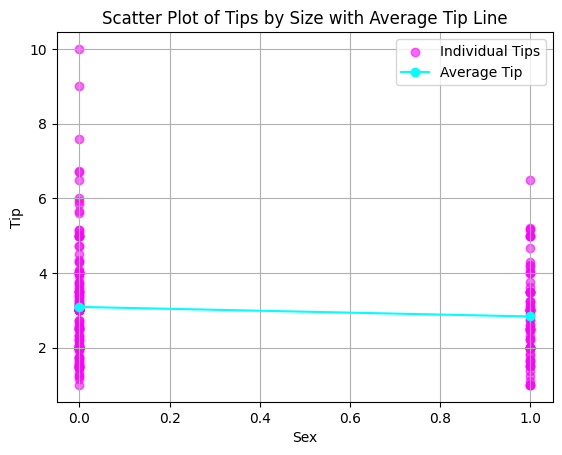

In [12]:
average_tips = df.groupby('sex')['tip'].mean()

plt.scatter(df['sex'], df['tip'], color='magenta', label='Individual Tips', alpha=0.6)

plt.plot(average_tips.index, average_tips.values, color='cyan', marker='o', linestyle='-', linewidth=1.5, label='Average Tip')

plt.xlabel('Sex')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tips by Size with Average Tip Line')
plt.legend()
plt.grid(True)
plt.show()
# Males slightly tip more

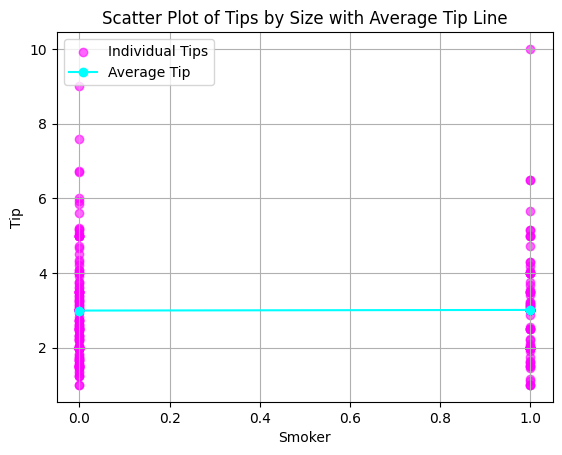

In [13]:
average_tips = df.groupby('smoker')['tip'].mean()

plt.scatter(df['smoker'], df['tip'], color='magenta', label='Individual Tips', alpha=0.6)

plt.plot(average_tips.index, average_tips.values, color='cyan', marker='o', linestyle='-', linewidth=1.5, label='Average Tip')

plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tips by Size with Average Tip Line')
plt.legend()
plt.grid(True)
plt.show()

# No much change

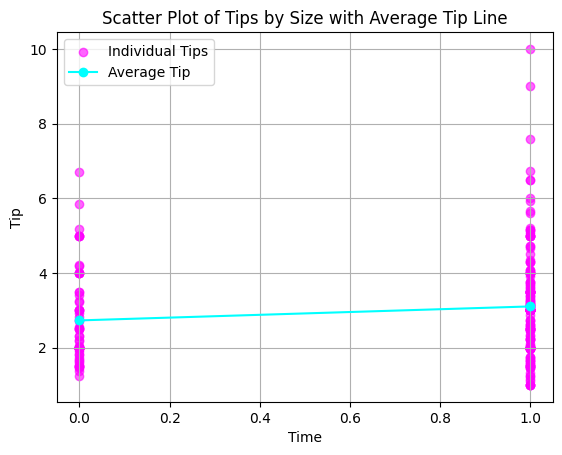

In [14]:
average_tips = df.groupby('time')['tip'].mean()

plt.scatter(df['time'], df['tip'], color='magenta', label='Individual Tips', alpha=0.6)

plt.plot(average_tips.index, average_tips.values, color='cyan', marker='o', linestyle='-', linewidth=1.5, label='Average Tip')

plt.xlabel('Time')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tips by Size with Average Tip Line')
plt.legend()
plt.grid(True)
plt.show()

# During dinners we see a slight increase in tips

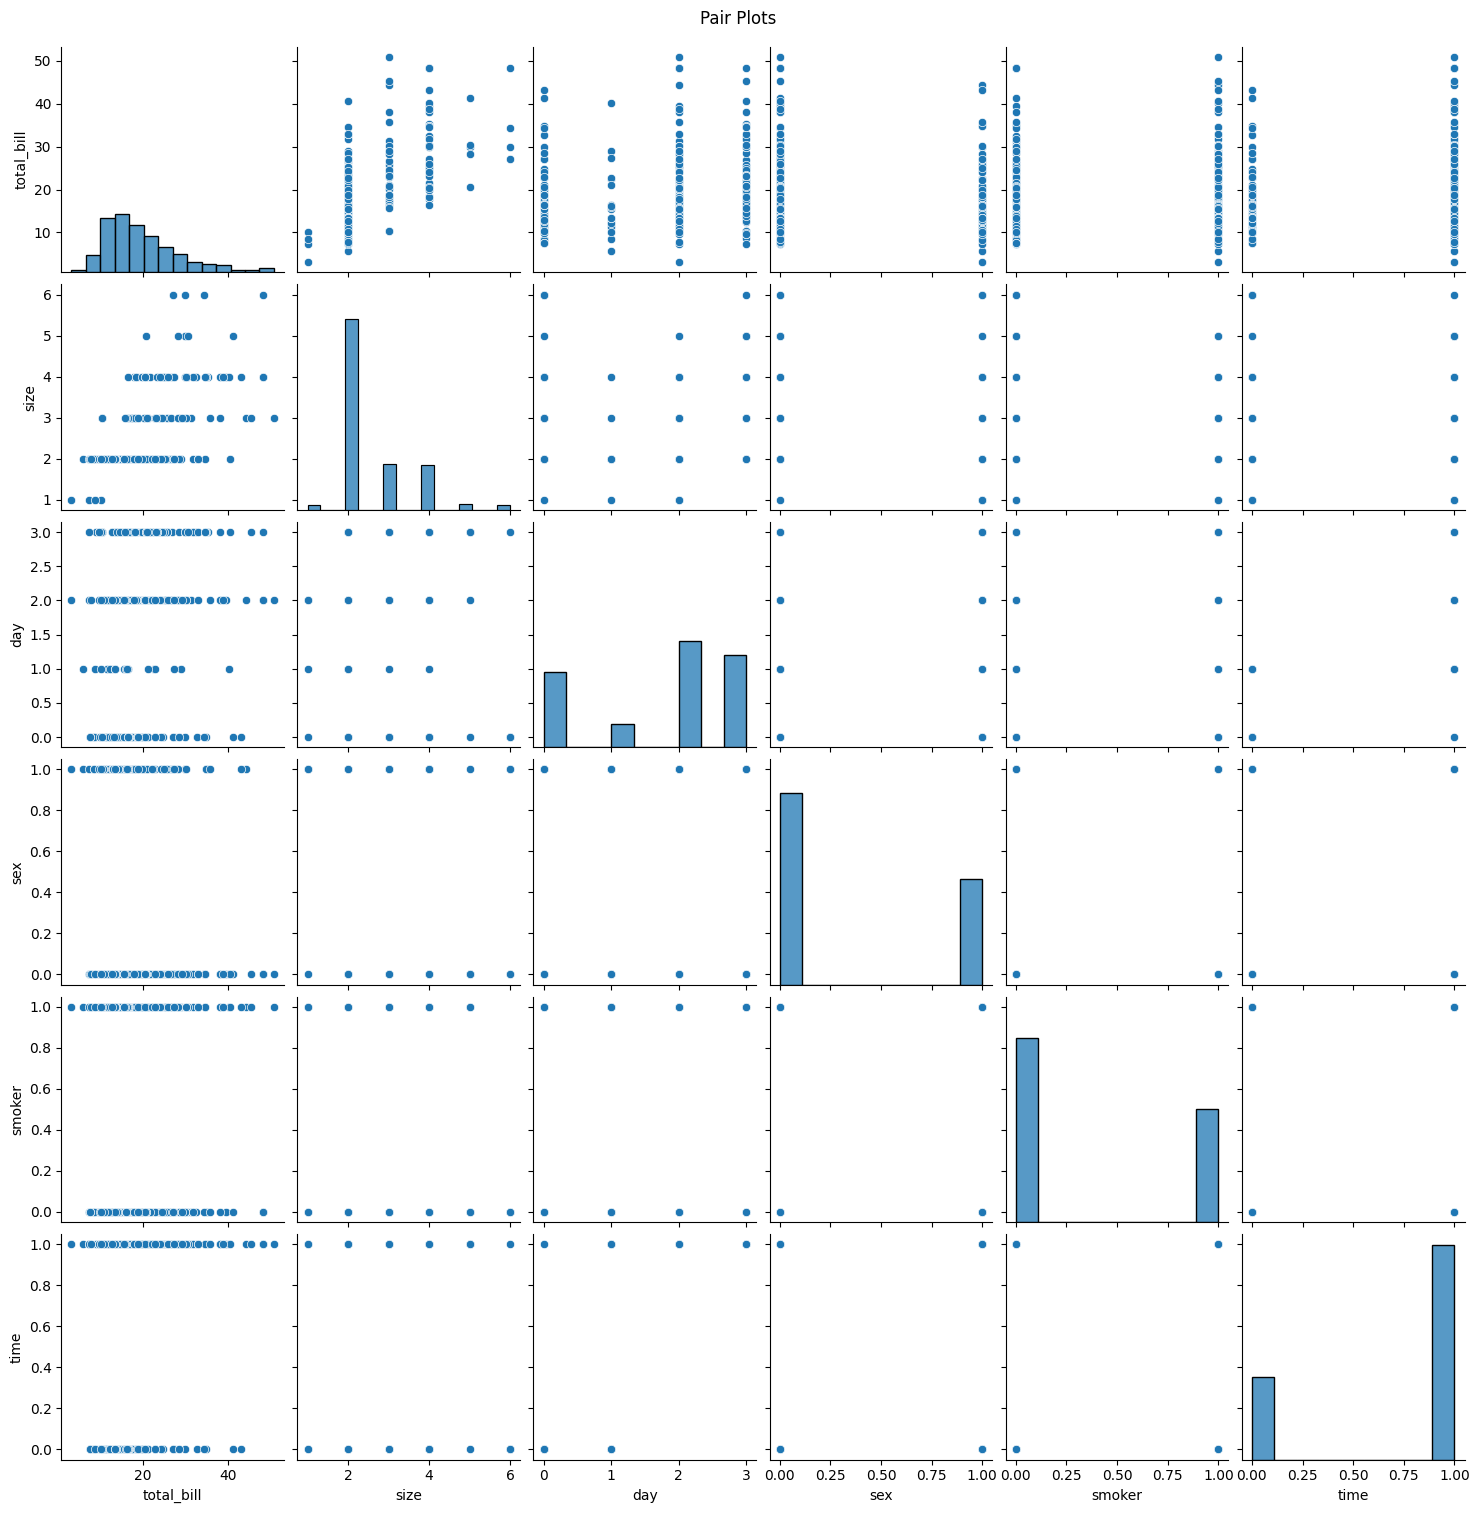

In [15]:
# Pair plot with all variables just to see some trends
sns.pairplot(df_new[['total_bill', 'size', 'day', 'sex', 'smoker', 'time']])
plt.suptitle('Pair Plots', y=1.01)
plt.show()


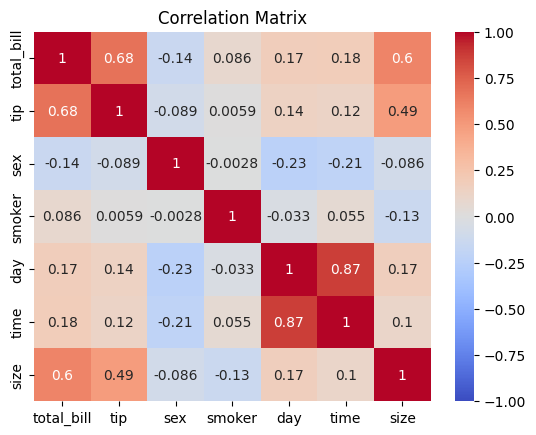

In [16]:
# Calculate correlation matrix
correlation_matrix = df_new.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



In [17]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = sm.add_constant(df_new[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]) 
y = df_new['tip']

model1 = sm.OLS(y, X).fit()

rainbow_stat, rainbow_p_value = linear_rainbow(model1)
print("Rainbow Test Statistic:", rainbow_stat)
print("p-value:", rainbow_p_value)

if rainbow_p_value < 0.05:
    print("Evidence of non-linearity.")
else:
    print("No evidence of non-linearity.")

# We can also see from our graphs that there is no much evidence for non linearity

Rainbow Test Statistic: 1.2019170616191859
p-value: 0.15984739633896822
No evidence of non-linearity.


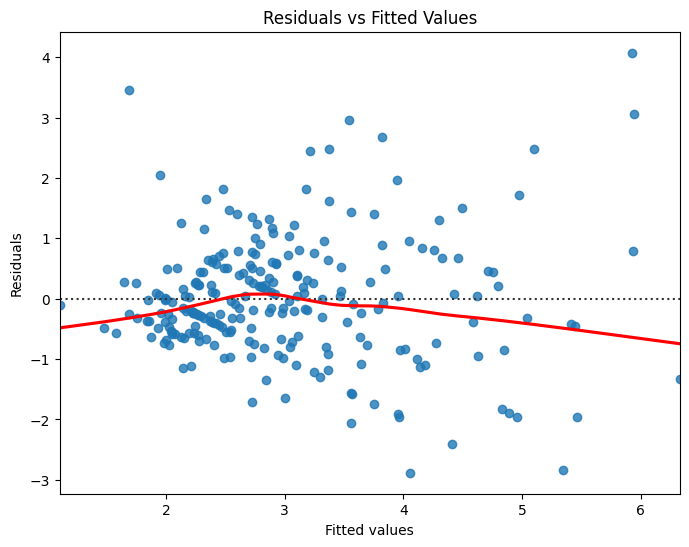

In [18]:

residuals = model1.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=model1.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# The residuals do not appear to be completely randomly scattered around zero, as there’s a slight trend or curve. 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error


models = [
('Linear Regression', LinearRegression()),
('Ridge', Ridge()),
('Lasso', Lasso()),
('Decision Tree Regressor', DecisionTreeRegressor()),
('K Neighbors Regressor', KNeighborsRegressor()),
('Random Forest Regressor', RandomForestRegressor(random_state=2)),
('SVR', SVR()) 
         ]
def ml_model(X_train, X_test, y_train, y_test):
    results = []


    for model_name, model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred) 
    
        rmse = root_mean_squared_error(y_test, y_pred)

        result = {
            'Model': model_name,
            'r2': r2,
            'mse': mse,
            'rmse': rmse
        }
        results.append(result)
    return results

In [20]:
X = df_new.drop(columns=["tip"])
Y = df_new["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state =2, test_size = 0.20)

mms = MinMaxScaler()
cols = ["total_bill"]
X_train[cols] = mms.fit_transform(X_train[cols])

X_test[cols] = mms.transform(X_test[cols])

res = ml_model(X_train, X_test, y_train, y_test)

pd.DataFrame(res)

,Model,r2,mse,rmse
0,Linear Regression,0.566619,0.955405,0.977448
1,Ridge,0.541310,1.011198,1.005584
2,Lasso,-0.028958,2.268377,1.506113
3,Decision Tree Regressor,0.355894,1.419955,1.191619
4,K Neighbors Regressor,0.290444,1.564242,1.250697
5,Random Forest Regressor,0.635296,0.804004,0.896663
6,SVR,0.426184,1.264998,1.124721


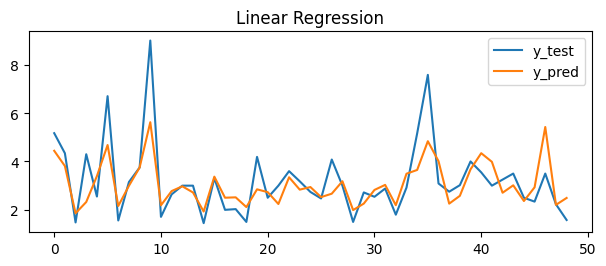

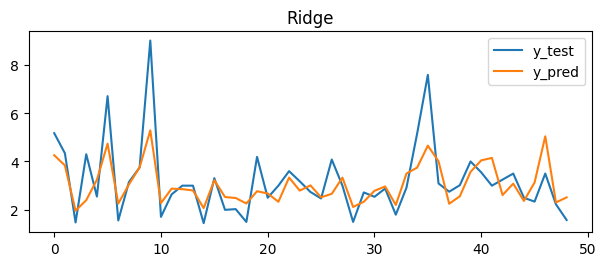

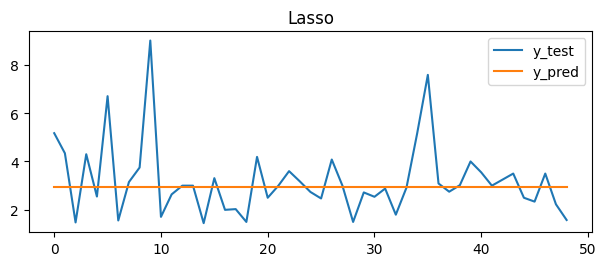

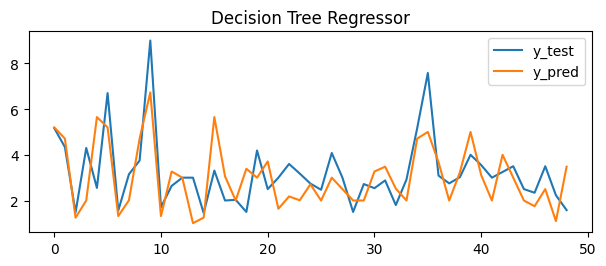

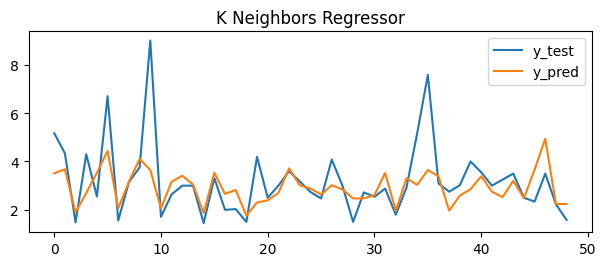

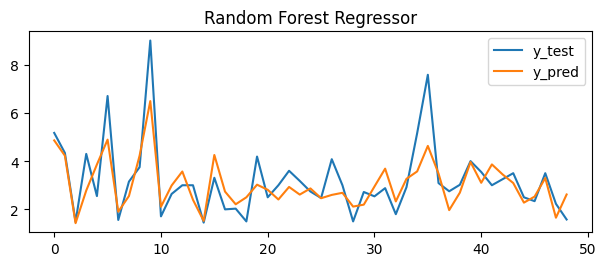

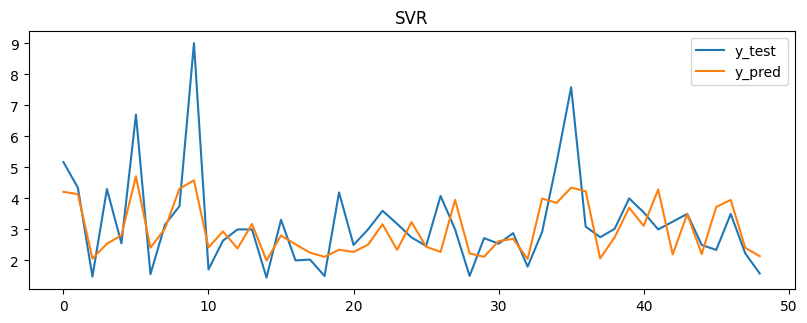

In [21]:
for model_name, model in models:

    y_pred = model.predict(X_test)
  
    models2= [(y_pred, model_name)]

    models2.sort(key=lambda x: r2_score(y_test, x[0]), reverse=True)
    plt.figure(figsize=(16,12))
    for i, (y_pred, model_name) in enumerate(models2):
        plt.subplot(4, 2, i + 1)
        plt.plot(y_test.values, label='y_test')
        plt.plot(y_pred, label='y_pred')
        plt.title(model_name)
        plt.legend()

plt.tight_layout()
plt.show()


Answer to Q2: Random Forest Regressor is the best performing model with the highest R² and lowest error metrics.Linear Regression and Ridge offer moderate performance and are good at capturing the linear relationship.Lasso, K Neighbors, and Decision Trees underperform, likely due to the challenges of capturing non-linear relationships or overfitting.

Factors that are affecting tips: Majorly the total bill and size, and somewhat the day, time and sex. (Answer to Q1)

(Answer to Q3)Encourage larger group reservations, as they tend to tip more. Train staff to provide excellent service to larger groups, especially those around size 4, to overcome the slight dip in tips.
Consider introducing dinner specials to boost the total bill, leading to higher tip amounts.
Focus on increasing the average bill during the weekend.
Offer promotions on Fridays to encourage more customers to dine out.
Consider dynamic pricing or bundle offers during peak times (like weekends and dinner hours) to increase the total bill, thus increasing tips.